In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import skewnorm
from scipy.stats import exponnorm
from customplotting.general import plot_xy, save_fig
from functions import *


Bad key "text.kerning_factor" on line 4 in
C:\Users\sarth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [80]:
# function dn/dt
def model(n, t, k1=1e5, k2=2e-10):
    dndt= -(k2*(n**2) + k1*n)
    return dndt # rate of change of carrier density

### First case k1 = 1e5 s^-1
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = 1e5
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [3]:
# function dn/dt
def model_1(n,t):
    k1= 1e5
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt # rate of change of carrier density

In [4]:
# initial condition
n0 = np.power(10, 14)

In [5]:
# time points
t = np.linspace(0,1000)*1e-9

In [6]:
# solve differential equation
n = odeint(model_1, n0, t) # 

In [7]:
# calculate PL
k2 = 2e-10
pl = k2 * (n ** 2)

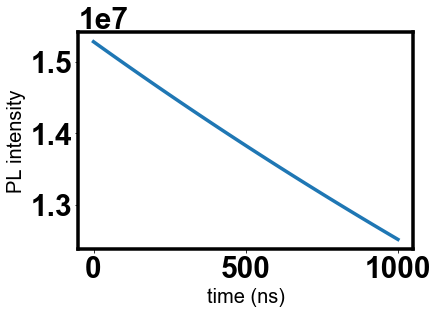

In [8]:
plt.plot(t*1e9, pl)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [9]:
stretched_exp = stretch_exp_fit(pl/np.max(pl), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 10000.0
Beta = 0.9995848211256194
avg. tau (ns) = 10001.756750866261


In [10]:
double_exp = double_exp_fit(pl/np.max(pl), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 645.1778567984614
a1 = 8.181162000420183e-05
tau2 (ns) = 9992.669731324111
a2 = 0.9561281853186853
avg. tau (ns) = 9991.869976609478


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
C:\Users\sarth\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


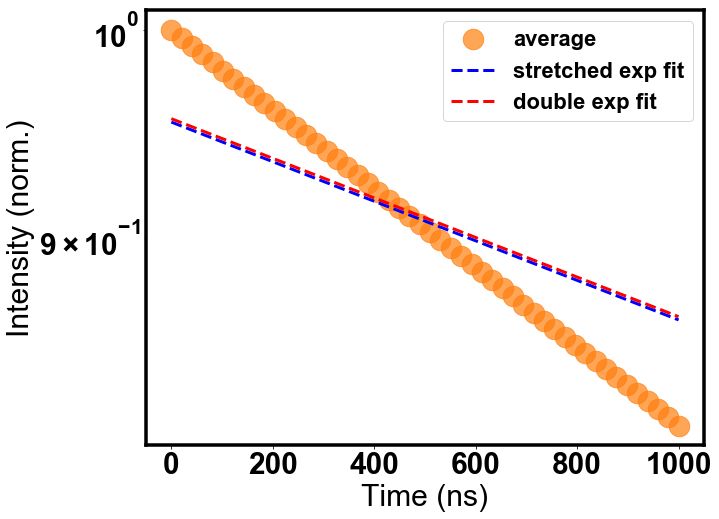

In [11]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl/np.max(pl),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

### Second case k1 = 1e7 s^-1
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = 1e7
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [12]:
# function dn/dt
def model_2(n,t):
    k1= 1e7
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt

In [13]:
# solve differential equation
n = odeint(model_2, n0, t)

In [14]:
# calculate PL
k2 = 2e-10
pl = k2 * (n ** 2)

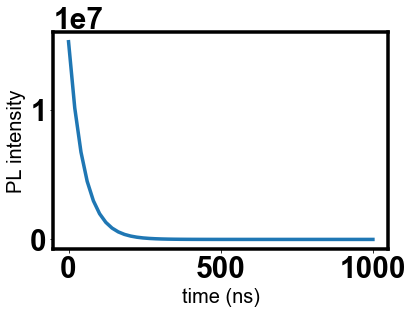

In [15]:
plt.plot(t*1e9, pl)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [16]:
stretched_exp = stretch_exp_fit(pl/np.max(pl), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 9518.365735098625
Beta = 0.9774028691786087
avg. tau (ns) = 9613.50898246337


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [20]:
double_exp = double_exp_fit(pl/np.max(pl), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 1.4706762935732978
a1 = 0.035367047528192586
tau2 (ns) = 9732.80857217941
a2 = 0.19525786167791293
avg. tau (ns) = 8240.477622060234


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))


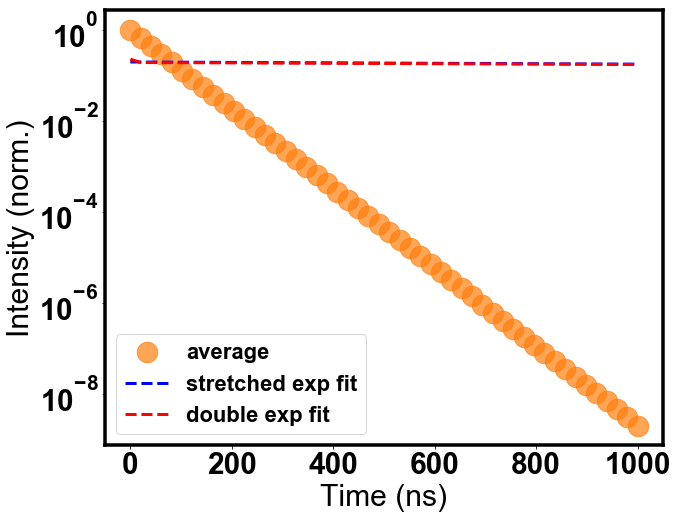

In [21]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl/np.max(pl),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

### Third case k1 from 1e5 to 1e7 s^-1
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = 1e5 to 1e7
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [24]:
# function dn/dt
def model_3(n,t):
    k1= np.linspace(1e5, 1e7, 50)
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt

In [25]:
# initial condition
n0 = np.tile(np.power(10, 14), 50)

In [26]:
# solve differential equation
n = odeint(model_3, n0, t)

In [27]:
# calculate PL
k2 = 2e-10
pl = k2 * (n ** 2)

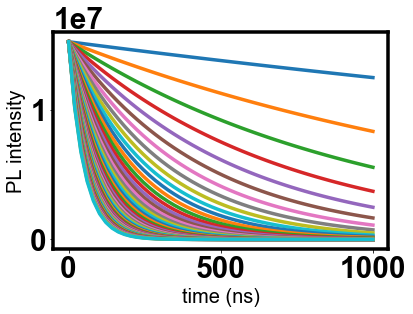

In [39]:
plt.plot(t*1e9, pl)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [44]:
pl_sum = pl.sum(axis=-1) # weights for pl
pl_avg = np.average(pl, weights=pl_sum, axis=-1)

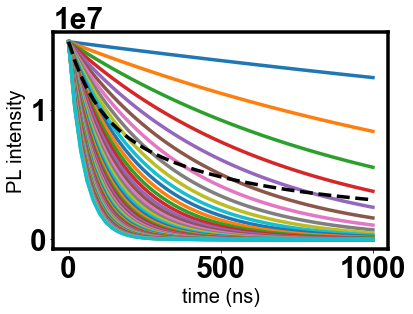

In [48]:
plt.plot(t*1e9, pl)
plt.plot(t*1e9, pl_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [49]:
stretched_exp = stretch_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 363.84736283277937
Beta = 0.5403356956882525
avg. tau (ns) = 636.8924196941214


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [50]:
double_exp = double_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 128.2852234080794
a1 = 0.5032458064382558
tau2 (ns) = 1110.1606701508615
a2 = 0.4823010291341513
avg. tau (ns) = 608.7895701858297


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


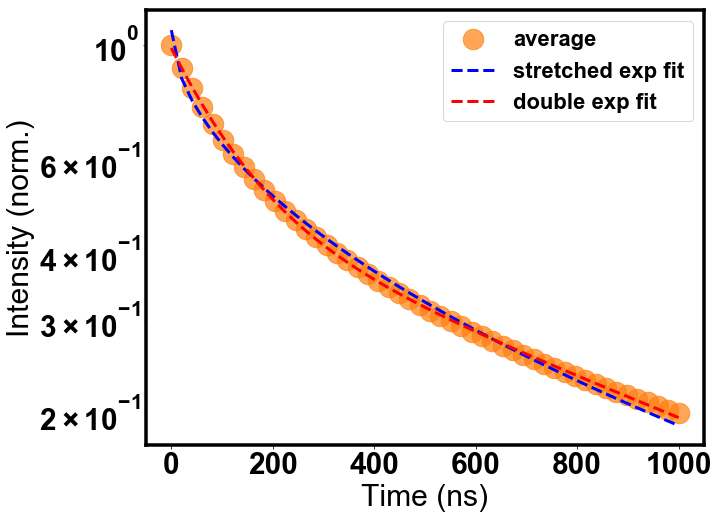

In [51]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_avg/np.max(pl_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

### Fourth case k1 skewed gaussian distribution
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e5 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [70]:
# skewed gaussian distribution of k1 values
# search for log spaced skewed distribution
skew = skewnorm.rvs(a = 10, loc = 1e6, scale=10000000, size=50)

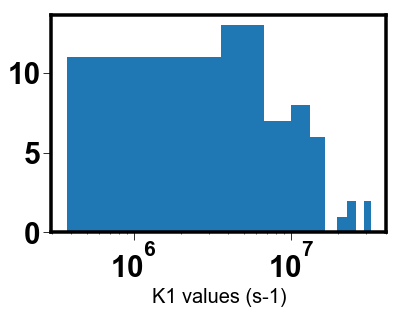

In [71]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

In [72]:
# function dn/dt
def model_4(n,t):
    k1= skew
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt

In [73]:
# initial condition
n0 = np.tile(np.power(10, 14), 50)

In [74]:
# solve differential equation
n = odeint(model_4, n0, t)

In [75]:
pl = k2 * (n ** 2)

In [76]:
pl_skew_sum = pl.sum(axis=-1)
pl_skew_avg = np.average(pl, weights=pl_skew_sum, axis=-1)

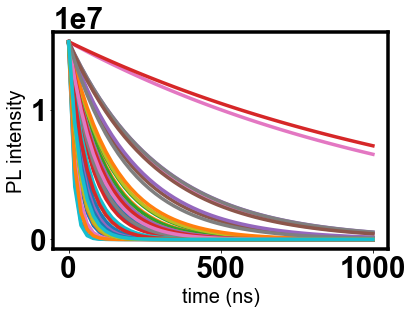

In [77]:
plt.plot(t*1e9, pl)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

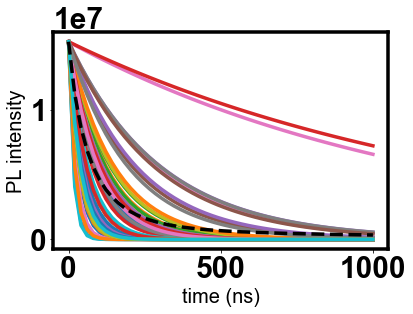

In [83]:
plt.plot(t*1e9, pl)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

### Fifth case k1 skewed gaussian distribution
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e6 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [72]:
norm = exponnorm.rvs(K = 10, loc= 1e6, scale= 100, size= 50)

Text(0.5, 0, 'K1 values (s-1)')

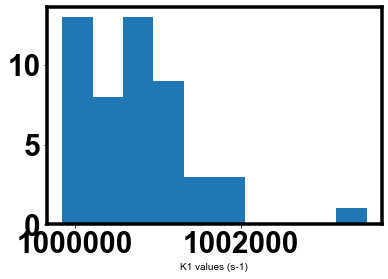

In [73]:
plt.figure()
plt.hist(norm)
plt.xlabel("K1 values (s-1)")

In [74]:
# function dn/dt
def model_5(n,t):
    k1= norm
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt

In [75]:
# solve differential equation
n = odeint(model_5, n0, t)

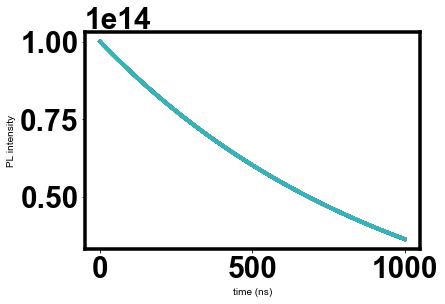

In [76]:
plt.plot(t*1e9, n)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [77]:
n_skew_avg = np.average(n, axis=0)

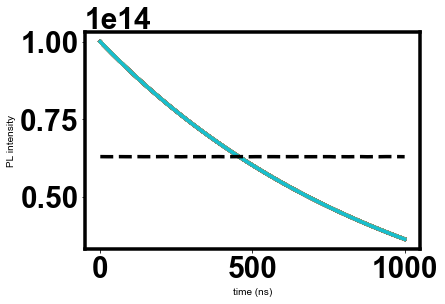

In [78]:
plt.plot(t*1e9, n)
plt.plot(t*1e9, n_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()